<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#per-region" data-toc-modified-id="per-region-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>per region</a></span></li><li><span><a href="#per-image_name-(=-hirise-obs_id)" data-toc-modified-id="per-image_name-(=-hirise-obs_id)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>per image_name (= hirise obs_id)</a></span></li><li><span><a href="#Figure-for-HiRISE-meeting" data-toc-modified-id="Figure-for-HiRISE-meeting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure for HiRISE meeting</a></span></li></ul></div>

In [1]:
from planet4 import region_data, io, stats

# per region

In [9]:
def process_region(args):
    from planet4 import region_data, io, stats
    regionclass, season = args
    try:
        image_names = getattr(regionclass, season)
    except AttributeError:
        print("No data for that season found.")
        return None
    results = []
    for image_name in image_names:
        df = io.DBManager(s23=False).get_image_name_markings(image_name)
        results.append(stats.get_status_per_classifications(df))
    resdf = pd.DataFrame(dict(image_name=image_names, completion=results))
    resdf['season'] = season
    resdf['region'] = regionclass.__name__
    return resdf

In [3]:
def get_process_list():
    processlist = []
    for season in ['season'+str(i) for i in range(1,5)]:
        for region in region_data.regions:
            processlist.append((region, season))
    return processlist

In [4]:
get_process_list()

[(planet4.region_data.Giza, 'season1'),
 (planet4.region_data.Inca, 'season1'),
 (planet4.region_data.Ithaca, 'season1'),
 (planet4.region_data.Manhattan, 'season1'),
 (planet4.region_data.Manhattan2, 'season1'),
 (planet4.region_data.Giza, 'season2'),
 (planet4.region_data.Inca, 'season2'),
 (planet4.region_data.Ithaca, 'season2'),
 (planet4.region_data.Manhattan, 'season2'),
 (planet4.region_data.Manhattan2, 'season2'),
 (planet4.region_data.Giza, 'season3'),
 (planet4.region_data.Inca, 'season3'),
 (planet4.region_data.Ithaca, 'season3'),
 (planet4.region_data.Manhattan, 'season3'),
 (planet4.region_data.Manhattan2, 'season3'),
 (planet4.region_data.Giza, 'season4'),
 (planet4.region_data.Inca, 'season4'),
 (planet4.region_data.Ithaca, 'season4'),
 (planet4.region_data.Manhattan, 'season4'),
 (planet4.region_data.Manhattan2, 'season4')]

In [5]:
from ipyparallel import Client
c = Client()
lbview = c.load_balanced_view()

In [6]:
from nbtools import display_multi_progress

In [10]:
import sys
processlist = get_process_list()
results = lbview.map_async(process_region, processlist)
display_multi_progress(results, processlist)

In [12]:
statusdf = pd.concat(results.result(), ignore_index=True)

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110f97e10>]], dtype=object)

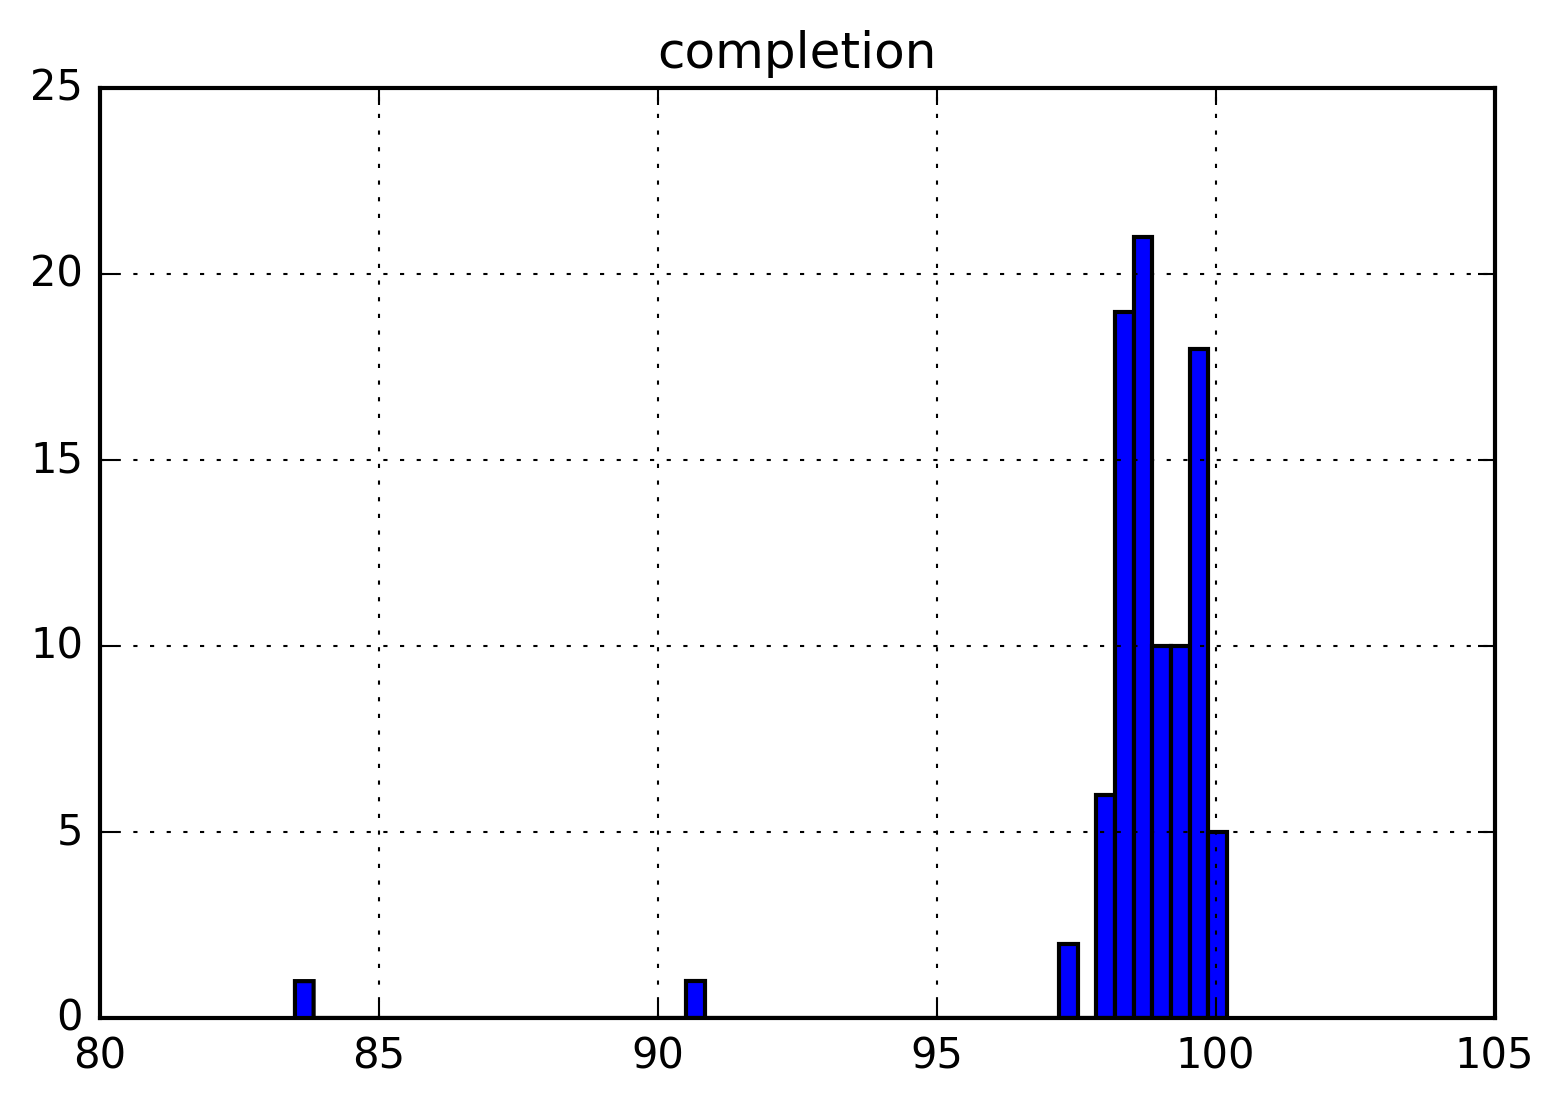

In [17]:
statusdf[statusdf.completion < 110].hist(bins=50)

In [19]:
get_process_list()

[(planet4.region_data.Giza, 'season1'),
 (planet4.region_data.Inca, 'season1'),
 (planet4.region_data.Ithaca, 'season1'),
 (planet4.region_data.Manhattan, 'season1'),
 (planet4.region_data.Manhattan2, 'season1'),
 (planet4.region_data.Giza, 'season2'),
 (planet4.region_data.Inca, 'season2'),
 (planet4.region_data.Ithaca, 'season2'),
 (planet4.region_data.Manhattan, 'season2'),
 (planet4.region_data.Manhattan2, 'season2'),
 (planet4.region_data.Giza, 'season3'),
 (planet4.region_data.Inca, 'season3'),
 (planet4.region_data.Ithaca, 'season3'),
 (planet4.region_data.Manhattan, 'season3'),
 (planet4.region_data.Manhattan2, 'season3'),
 (planet4.region_data.Giza, 'season4'),
 (planet4.region_data.Inca, 'season4'),
 (planet4.region_data.Ithaca, 'season4'),
 (planet4.region_data.Manhattan, 'season4'),
 (planet4.region_data.Manhattan2, 'season4')]

In [18]:
statusdf[statusdf.completion < 95]

,completion,image_name,season,region
154,90.7,ESP_030106_0950,season4,Giza
156,83.5,ESP_030251_0950,season4,Giza


# per image_name (= hirise obs_id)

In [ ]:
from planet4 import io

In [ ]:
# image_names = io.get_all_image_names()
# image_names = image_names.image_name.unique()
# with open('current_image_names.pkl', 'wb') as f:
#     pickle.dump(image_names, f)

In [ ]:
image_names = io.get_image_names_from_db(io.get_current_database_fname())

In [ ]:
from planet4 import helper_functions as hf

In [ ]:
def process_image_name(image_name):
    from planet4 import helper_functions as hf
    from planet4 import io
    df = io.get_image_name_data(image_name)
    status = hf.get_status_per_classifications(df)
    return image_name, status

In [ ]:
def process_image_name(image_name):
    from planet4 import helper_functions as hf
    from planet4 import io
    df = io.get_image_name_data(image_name)
    no_done = hf.get_no_tiles_done(df)
    return {'image_name': image_name, 'no_done': no_done}

In [ ]:
from ipyparallel import Client
c = Client()
lbview = c.load_balanced_view()

In [ ]:
results = lbview.map_async(process_image_name, image_names)

In [ ]:
for result in results:
    print(result)

In [ ]:
df = pd.DataFrame(results.result)
df = df.set_index('image_name')
df

In [ ]:
df.no_done.sum()

In [ ]:
%matplotlib nbagg

In [ ]:
df = df.drop('tutorial')

In [ ]:
df.plot(kind='hist',bins=30)

In [ ]:
df = pd.read_hdf('image_name_status.h5','df')

In [ ]:
df.head()

# Figure for HiRISE meeting

In [ ]:
import helper_functions as hf
reload(hf)

pd.__version__

df = hf.get_current_cleaned()

users_work = hf.classification_counts_per_user(df)
topten = users_work.order(ascending=False)[:10]

topten

hf.classification_counts_for_user('Kitharode',df)

for user in topten.index:
    print user
    print df[df.user_name==user].marking.value_counts()

df.marking.value_counts().plot?

s = df.marking.value_counts()

s.plot(kind='bar')
title('Marking stats')

savefig("marking_stats.png",dpi=200)

df.columns

no_nones = df[df.marking != 'None']

hf.get_top_ten_users(no_nones)

topten = hf.get_top_ten_users(df)

topten.plot(kind='bar')
title("Top ten citizens, submissions")
savefig('top_ten_submitters.png',dpi=200)